In [1]:
# activate cvenv as kernel

In [2]:
# if you are outside of the package you would run: "import ProjectDatasets.CZIDataset"
import czi
import matplotlib.pyplot as plt
import skimage
import numpy as np

In [3]:
skimage.__version__

'0.22.0'

In [4]:
folder = "/mnt/datadisk/FactinMIP"

In [5]:
dataset = czi.CZIDataset(folder=folder,twod_vid_channel=0,transform = czi.Transforms2D.scale_img)
MIP_video, shape, dims = dataset[0]
print(MIP_video.shape)

(62, 2048, 612)


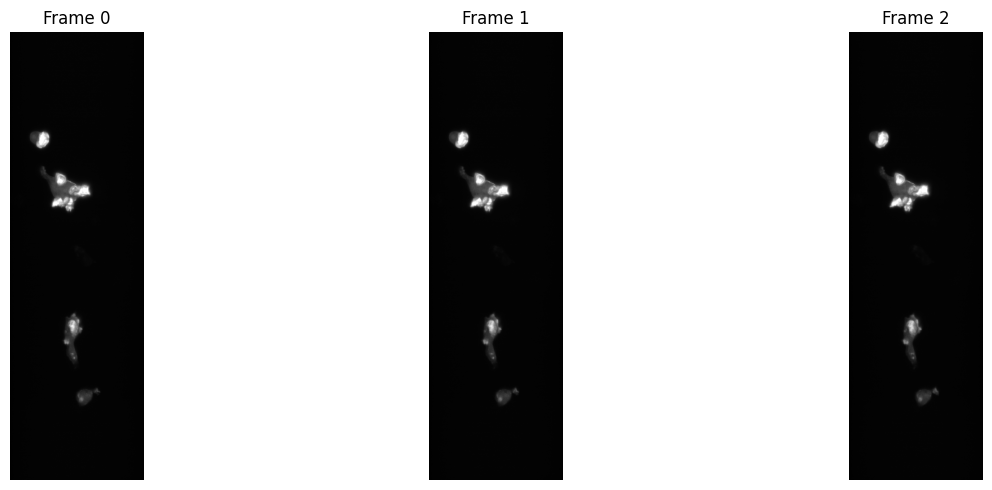

In [6]:
# Parameters
num_frames_to_display = 3  # How many frames you want to display
num_cols = 3  # Number of columns in subplot grid

# Calculate number of rows needed
num_rows = (num_frames_to_display + num_cols - 1) // num_cols  

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5))
axes = axes.flatten()

# Loop through the first few frames
for i in range(min(num_frames_to_display, len(MIP_video))):
    ax = axes[i]
    ax.imshow(MIP_video[i], cmap='gray')  # Use cmap='gray' for grayscale images
    ax.set_title(f'Frame {i}')
    ax.axis('off')  # Hide axes

# Turn off unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

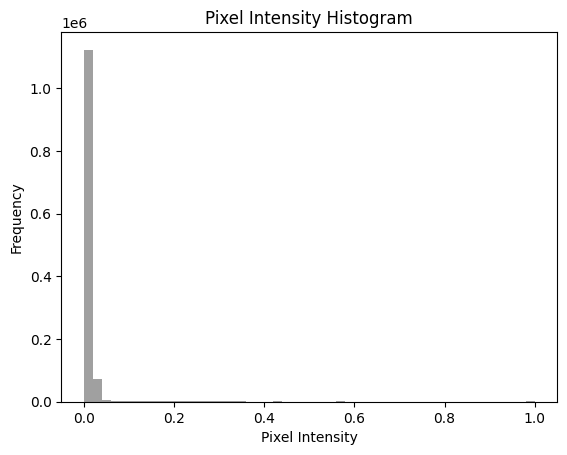

In [7]:
pixel_values = np.array(MIP_video[1]).flatten()  # Flatten the 2D array into 1D

# Plot histogram
plt.hist(pixel_values, bins=50, range=(0, 1), color='gray', alpha=0.75)
plt.title('Pixel Intensity Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()


In [8]:
all_bboxes_coords, max_num_cells, num_cells_frames = czi.Transforms2D.bounding_boxes_coords(MIP_video,thresh_calc='first-frames')
video_slices = czi.Transforms2D.coords_to_bbox_vid(MIP_video, all_bboxes_coords)

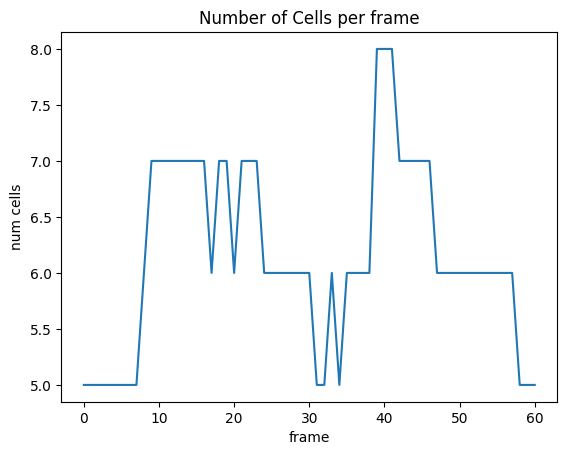

In [11]:
plt.figure()
plt.plot(range(len(num_cells_frames)), num_cells_frames)
plt.title('Number of Cells per frame')
plt.ylabel('num cells')
plt.xlabel('frame')
plt.show()

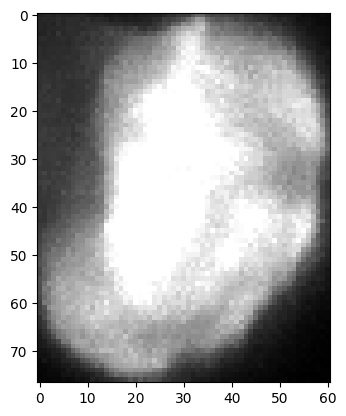

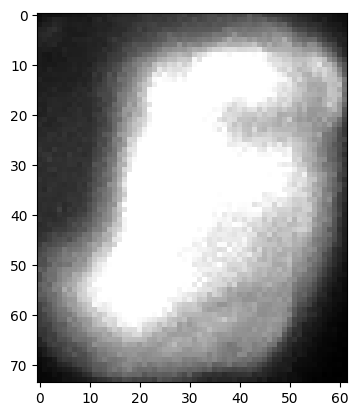

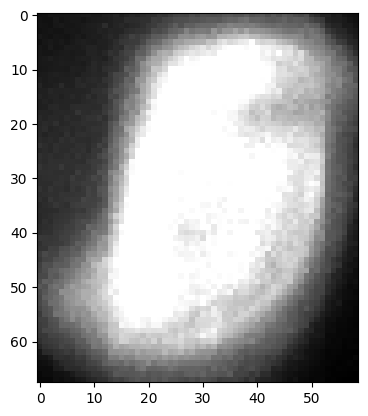

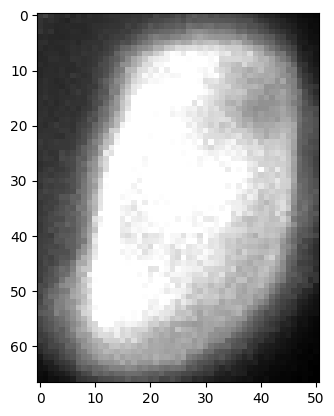

In [12]:
plt.figure()
plt.imshow(video_slices[0][0],cmap='gray')

plt.figure()
plt.imshow(video_slices[30][0],cmap='gray')

plt.figure()
plt.imshow(video_slices[40][0],cmap='gray')

plt.figure()
plt.imshow(video_slices[60][0],cmap='gray')

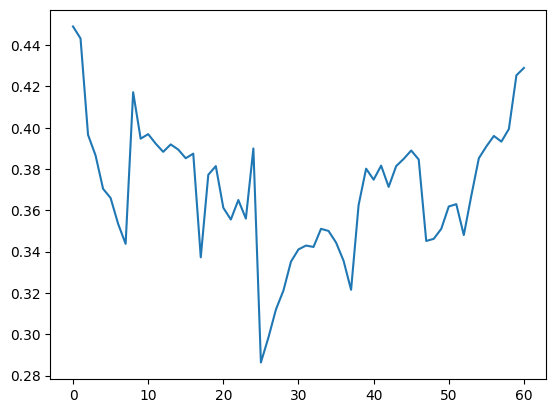

In [13]:
plt.plot(range(len(video_slices)), [np.mean(frame_bound_box[3]) for frame_bound_box in video_slices])
